In [7]:
import numpy as np
import sklearn
from data_collection.parse_pcap import pcap_to_pandas
import pickle
import pandas as pd
import ipaddress
import netaddr
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Play with K-Means

Let's see what happens when we apply a K-means algorithm to cluster our data!

We are going to visualize our data by choosing two dimensions of the data at a time that we want to cluster on. We do this because we want to be able to plot our data on a 2D grid, like the examples you have seen above.

We'll start by visualizing a clustering of the source IP and destination IP addresses of each packet33, which represents a pair of devices on the internet that are taking to each other.

1) Visualize IP SRC and IP DST

Expect to see a good clustering.

Now, let's try it with our dimensions being the source MAC address and the destination MAC addresses of each packet.
2) Visualize MAC SRC and MAC DST

Compare these clusters with the IP address clusters. 


Try experimenting with your own choices of data dimensions, and the number of clusters. You should try to come up with at least 3 sets of two data dimensions to cluster. For each, discuss why you think these two dimensions would be interesting to cluster. Then run K-means on the data, while choosing different numbers of clusters. Discuss your results, and what you think a good number of clusters would be for this data and why.

## Supervised vs Unsupervised Learning
So far you’ve seen multiple ways of doing supervised learning. In these types of problems, you start with labeled training examples and the goal is to learn from these data to label new data points in the future. However, prelabeled training data isn’t always available. Labelling large amounts of data ahead of time can be prohibitively expensive/time consuming. In some settings, we may also not know ahead of time what we want to learn from our data. In these situations, we use unsupervised learning

In unsupervised learning, the input is a set of unlabeled data, and the goal is to uncover some structure from this data. The most common form of unsupervised learning is clustering, a variant of which we will go over today. Other examples include dimensionality reduction, in which we start with a datapoint with many dimensions and try to find a lower dimensional representation that retains some aspect of the original data (such as pairwise distance between points).

## KMeans Intro
The goal behind k-means is to find groups in your dataset. This is done by visualizing your data as points in a high dimensional space, and then finding clusters of nearby points in the graph. The input to k means is a set of data points and a number of clusters. Given this input, the goal of k-means is to find the location of clusters and assignment of points to clusters that minimizes the following objective function.

$$RSE\ =\ \sum_{i=1}^kd(Ci\ ,\ xi)^2$$

Where d(x,y) is a standard distance function (such as euclidean). Here’s an example:
http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

Finding the optimal location of clusters is a hard problem. However, the following algorithm finds a decent approximation

Algorithm:
1. Pick a number k of clusters 
2. Initialize the positions of the clusters at random
3. Assign each point to the cluster closest to it
4. Move each cluster to the midpoint of all points assigned to it
5. Repeat steps 3 and 4 until convergence


In [19]:
data = pcap_to_pandas("example_pcaps/ross.pcap")

In [23]:
len(data["ip_dst"].unique())

113

[2.94393876e+08 3.01562358e+08 3.01562954e+08 3.01818314e+08
 3.99215555e+08 5.20963841e+08 5.20963847e+08 5.20963854e+08
 5.20963876e+08 5.20963878e+08 5.33500256e+08 5.83800327e+08
 7.08719865e+08 7.37748353e+08 8.72701744e+08 8.78010380e+08
 8.78010431e+08 8.78010451e+08 8.78010536e+08 8.78010956e+08
 9.18565138e+08 9.18565150e+08 9.18565155e+08 9.18565251e+08
 9.18565301e+08 9.18565308e+08 9.18565329e+08 9.18565550e+08
 1.10769794e+09 1.11816841e+09 1.16728274e+09 1.16728526e+09
 1.20935913e+09 1.20935917e+09 1.20992622e+09 1.24974900e+09
 1.33439607e+09 1.48942198e+09 1.74085878e+09 1.74590187e+09
 1.74590213e+09 1.74590965e+09 1.74590990e+09 1.74591016e+09
 1.74591040e+09 1.74614746e+09 1.74617167e+09 1.74688399e+09
 1.76083219e+09 1.76083310e+09 1.87578105e+09 1.94132088e+09
 1.94499619e+09 1.99181728e+09 2.01693143e+09 2.06156052e+09
 2.15484723e+09 2.15484728e+09 2.15484728e+09 2.15484732e+09
 2.15484734e+09 2.15484734e+09 2.15484735e+09 2.15484735e+09
 2.15484738e+09 2.154847

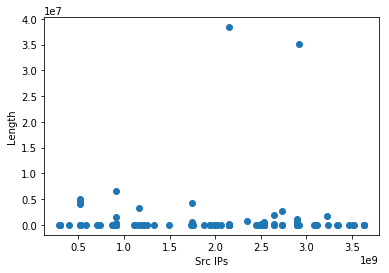

In [56]:
ip_src = data[data["ip_src_int"].notnull()]["ip_src_int"].unique()
ip_src.sort()
ip_src_lengths = data[data["ip_src_int"].notnull()].groupby("ip_src_int").sum()["length"]

print(ip_src)
print(ip_src_lengths)

plt.scatter(ip_src, ip_src_lengths)
plt.xlabel("Src IPs")
plt.ylabel("Length")
plt.show()

Text(0,0.5,'Lengths')

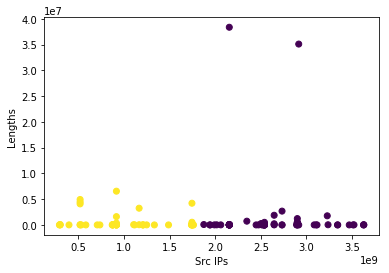

In [69]:
kmeans = KMeans(n_clusters=2)
kmeans_data = list(zip(ip_src, ip_src_lengths * 10))
kmeans.fit(kmeans_data)
clusters = kmeans.predict(kmeans_data)

plt.scatter(ip_src, ip_src_lengths, c=clusters)
plt.xlabel("Src IPs")
plt.ylabel("Lengths")

In [65]:
data.sort_values("length").tail(5)

,datetime,dns_query,dns_resp,ip_dst,ip_dst_int,ip_src,ip_src_int,is_dns,length,mac_dst,mac_dst_int,mac_src,mac_src_int,port_dst,port_src,protocol,time,time_normed
103209,2018-07-30 15:56:57.463114,None,None,162.222.44.11,2.732469e+09,128.112.92.150,2.154847e+09,False,1514,04:09:73:5f:c9:00,4438636873984,a8:60:b6:01:d0:a9,185133323899049,4282.0,56524.0,TCP,1.532981e+09,316.792548
52432,2018-07-30 15:54:11.000656,None,None,128.112.92.150,2.154847e+09,54.192.49.30,9.185652e+08,False,1514,a8:60:b6:01:d0:a9,185133323899049,04:09:73:5f:c9:00,4438636873984,56723.0,443.0,TCP,1.532980e+09,150.330090
52431,2018-07-30 15:54:11.000655,None,None,128.112.92.150,2.154847e+09,54.192.49.30,9.185652e+08,False,1514,a8:60:b6:01:d0:a9,185133323899049,04:09:73:5f:c9:00,4438636873984,56723.0,443.0,TCP,1.532980e+09,150.330089
103198,2018-07-30 15:56:57.463061,None,None,162.222.44.11,2.732469e+09,128.112.92.150,2.154847e+09,False,1514,04:09:73:5f:c9:00,4438636873984,a8:60:b6:01:d0:a9,185133323899049,4282.0,56524.0,TCP,1.532981e+09,316.792495
49783,2018-07-30 15:54:09.313542,None,None,128.112.92.150,2.154847e+09,54.192.49.30,9.185652e+08,False,1514,a8:60:b6:01:d0:a9,185133323899049,04:09:73:5f:c9:00,4438636873984,56723.0,443.0,TCP,1.532980e+09,148.642976
